In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

## Read the data

In [2]:
df = pd.read_csv(r'creditcard.csv')

In [3]:
print("Credit Card Fraud Detection data -  rows:",df.shape[0]," columns:", df.shape[1])

Credit Card Fraud Detection data -  rows: 284807  columns: 31


## Glimpse the data

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Let's look into more details to the data.

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Looking to the **Time** feature, we can confirm that the data contains **284,807** transactions, during 2 consecutive days (or **172792** seconds).

## Check missing data

In [6]:
df.isnull().sum().sort_values(ascending = False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

There is no missing data in the entire dataset.

## Data unbalance

Let's check data unbalance with respect to the *target* value.

<Axes: xlabel='Class', ylabel='count'>

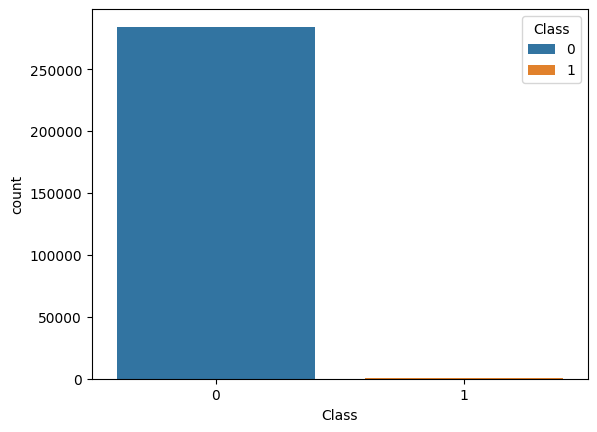

In [7]:
sns.countplot(data=df, x='Class', hue='Class')

Only **492** transactions are fraudulent. That means the data is highly unbalanced.

## Data exploration

### Transactions in time

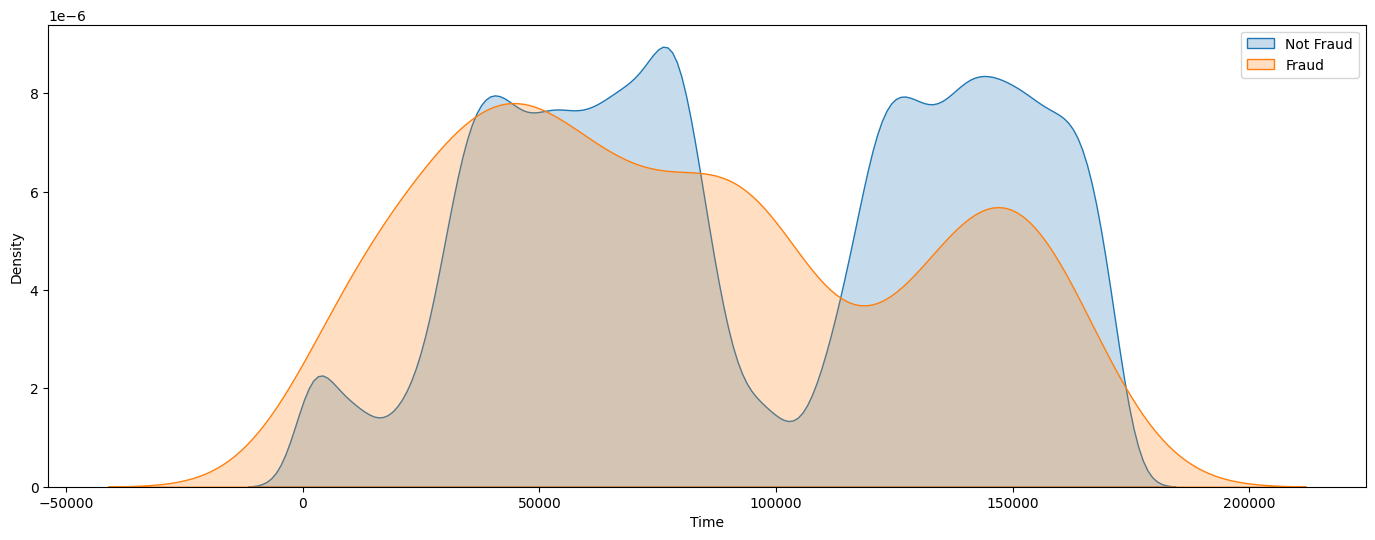

In [8]:
class_0 = df.loc[df['Class'] == 0]["Time"]
class_1 = df.loc[df['Class'] == 1]["Time"]

plt.figure(figsize=(17, 6))
sns.kdeplot(class_0, label='Not Fraud', fill=True)
sns.kdeplot(class_1, label='Fraud', fill=True)
plt.legend()
plt.show()

Fraudulent transactions are equally distributed in time, including the low real transaction times, during night in Europe timezone.

Let's look into more details to the time distribution of both classes transactions, as well as to aggregated values of transaction count and amount, per hour

In [9]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))

tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
tmp_df = pd.DataFrame(tmp)
tmp_df.columns = ['Hour', 'Class', 'Min', 'Max', 'Transactions', 'Sum', 'Mean', 'Median', 'Var']
tmp_df.head()

,Hour,Class,Min,Max,Transactions,Sum,Mean,Median,Var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


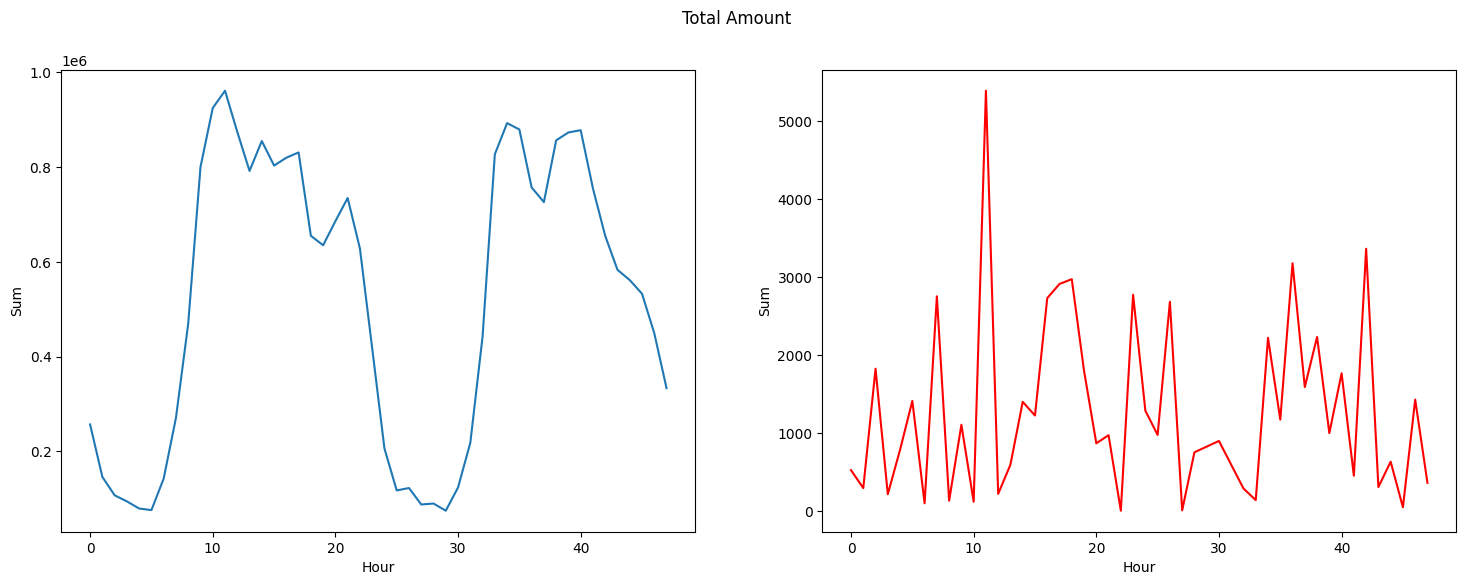

In [10]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Sum", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Sum", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Total Amount")
plt.show()

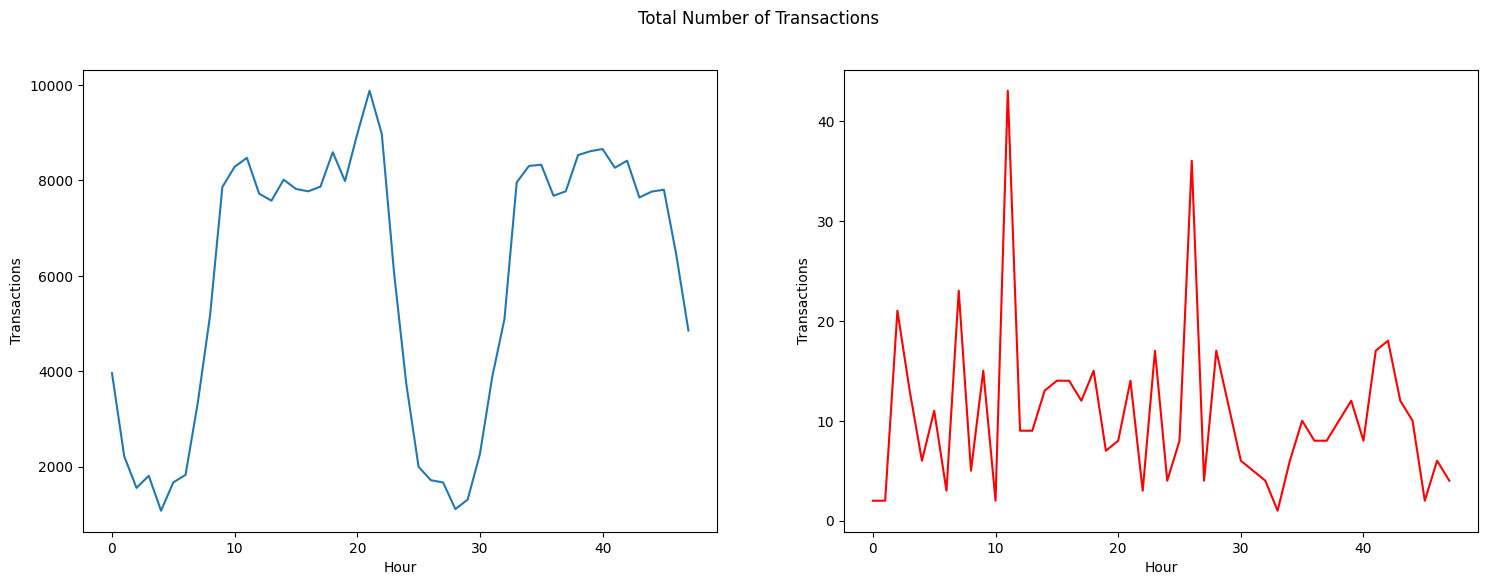

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Transactions", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Transactions", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Total Number of Transactions")
plt.show()

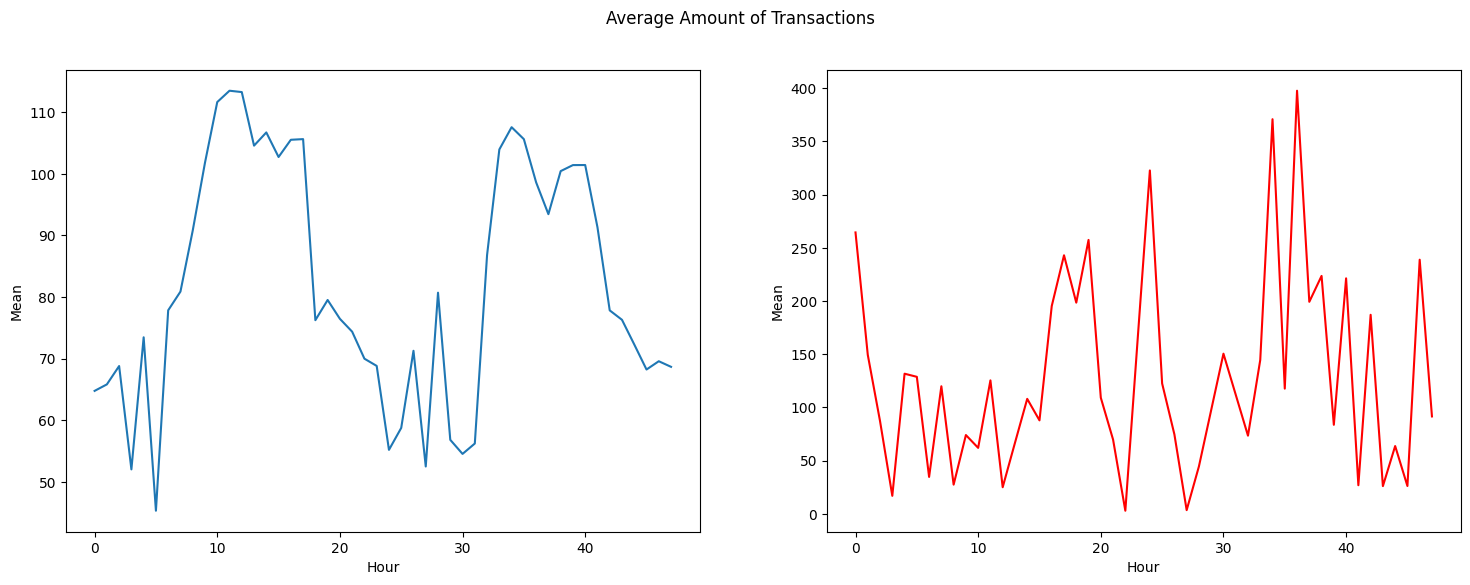

In [12]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Mean", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Mean", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Average Amount of Transactions")
plt.show()

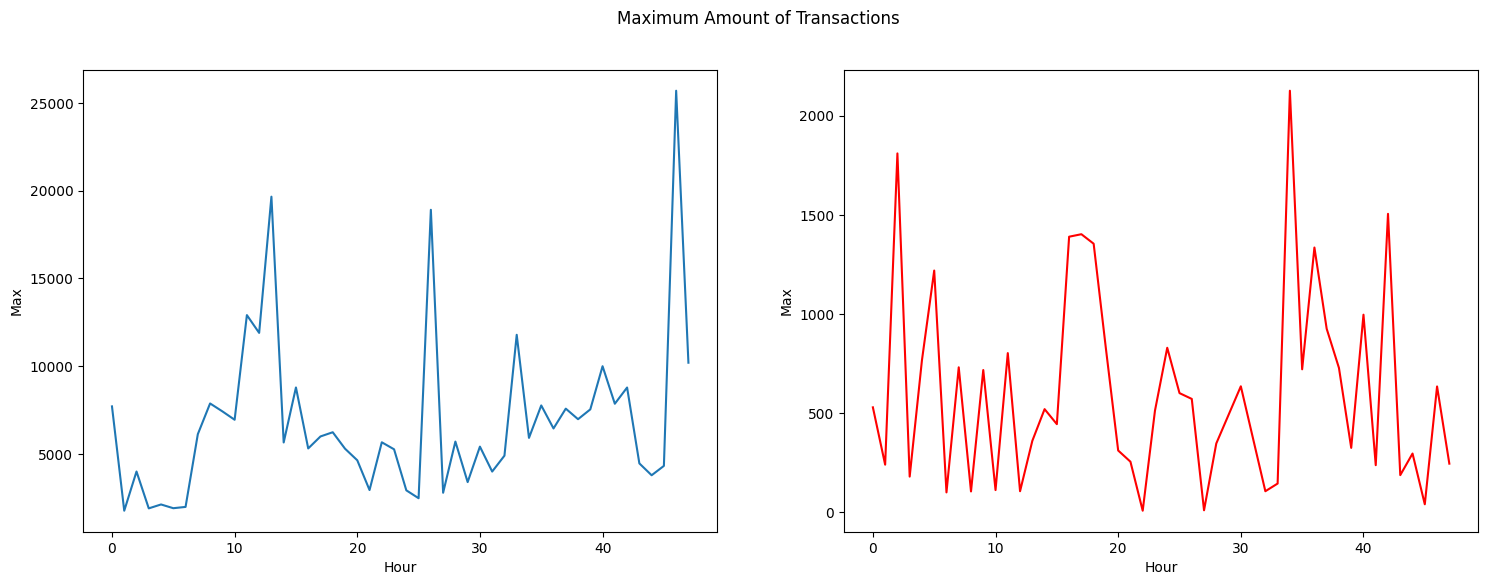

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Max", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Max", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Maximum Amount of Transactions")
plt.show()

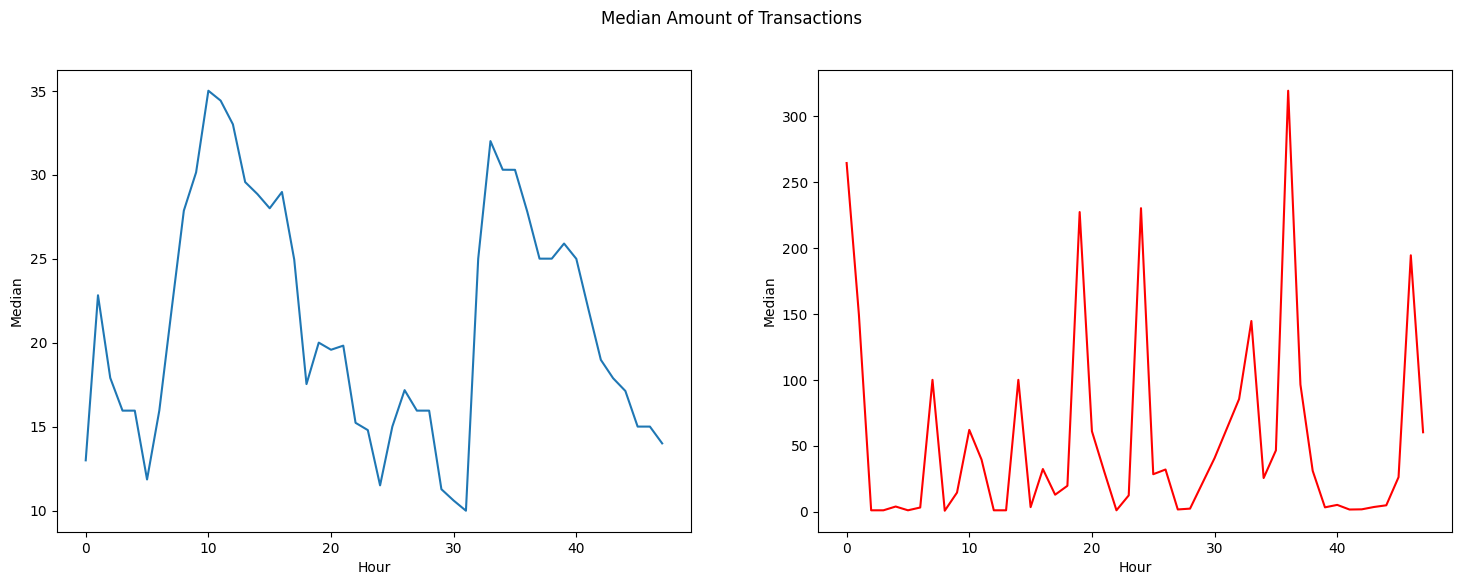

In [14]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Median", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Median", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Median Amount of Transactions")
plt.show()

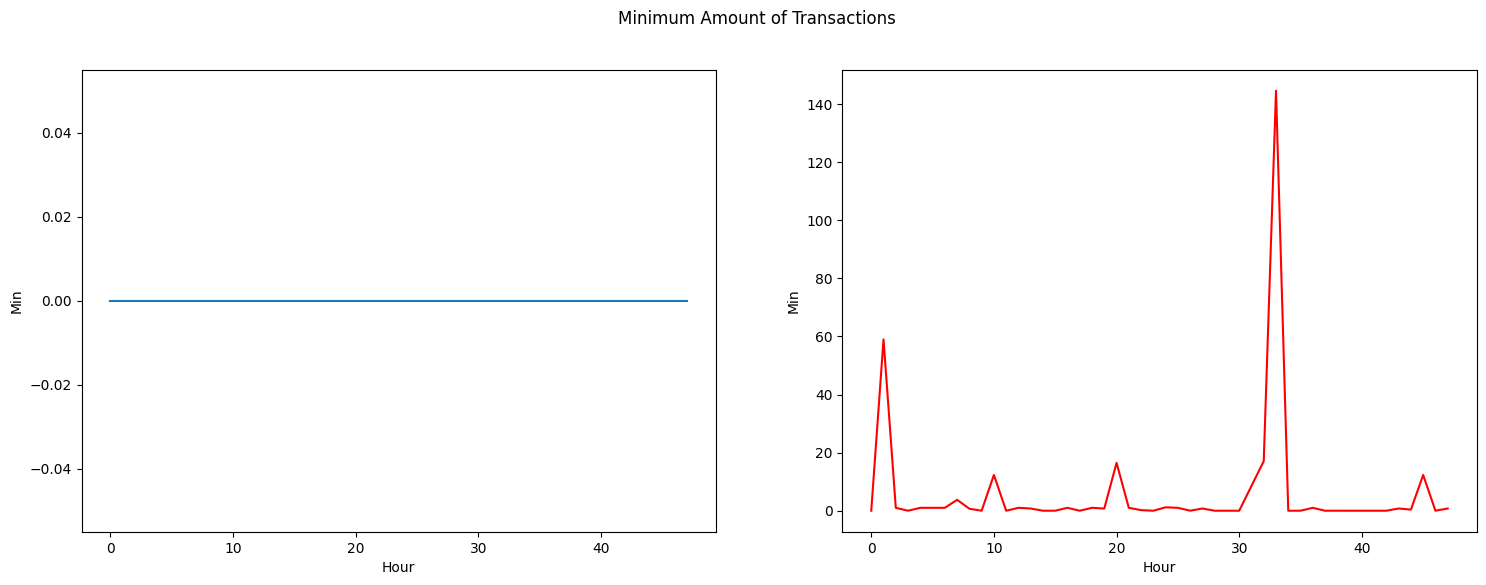

In [15]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="Min", data=tmp_df.loc[tmp_df.Class==0])
s = sns.lineplot(ax = ax2, x="Hour", y="Min", data=tmp_df.loc[tmp_df.Class==1], color="red")
plt.suptitle("Minimum Amount of Transactions")
plt.show()

### Transactions amount

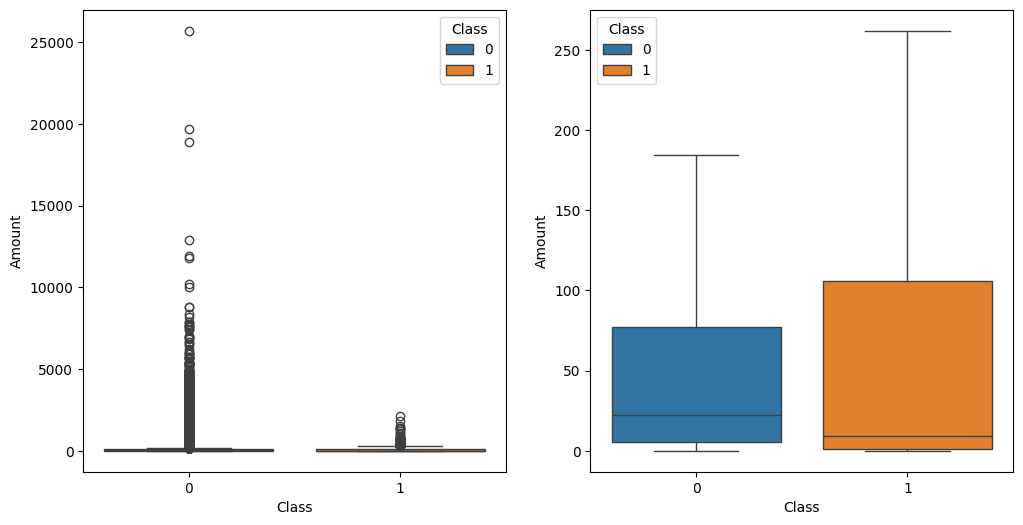

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df,showfliers=False)
plt.show()

In [17]:
tmp = df[['Amount','Class']].copy()
class_0 = tmp.loc[tmp['Class'] == 0]['Amount']
class_1 = tmp.loc[tmp['Class'] == 1]['Amount']
c0_desc = class_0.describe()
c1_desc = class_1.describe()

In [18]:
pd.DataFrame([c0_desc, c1_desc]).transpose()

,Amount,Amount
count,284315.000000,492.000000
mean,88.291022,122.211321
std,250.105092,256.683288
min,0.000000,0.000000
25%,5.650000,1.000000
50%,22.000000,9.250000
75%,77.050000,105.890000
max,25691.160000,2125.870000


The real transaction have a larger Q1, Q2 and outliers; fraudulent transactions have a larger mean and Q3.

Let's plot the fraudulent transactions (amount) against time.

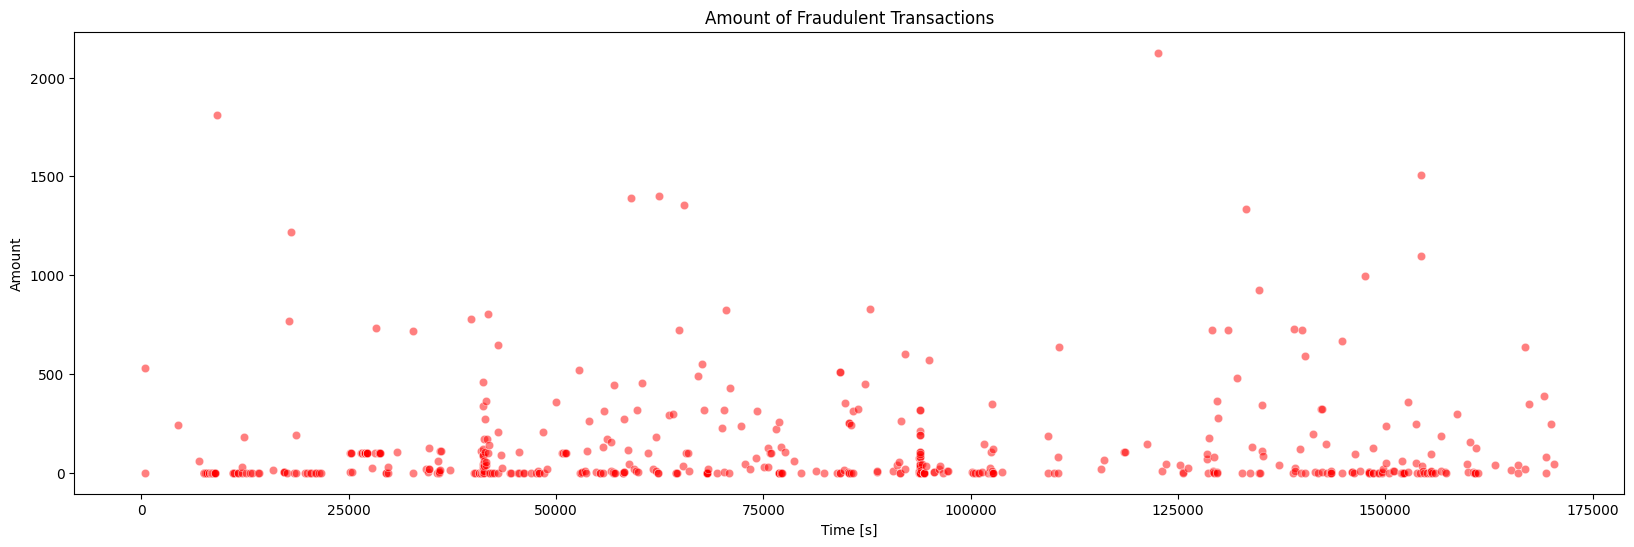

In [19]:
fraud = df.loc[df['Class'] == 1]

plt.figure(figsize=(20, 6))
scatter = sns.scatterplot(data=fraud, x='Time', y='Amount', color='red', alpha=0.5)

plt.title('Amount of Fraudulent Transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')
plt.show()

### Features correlation

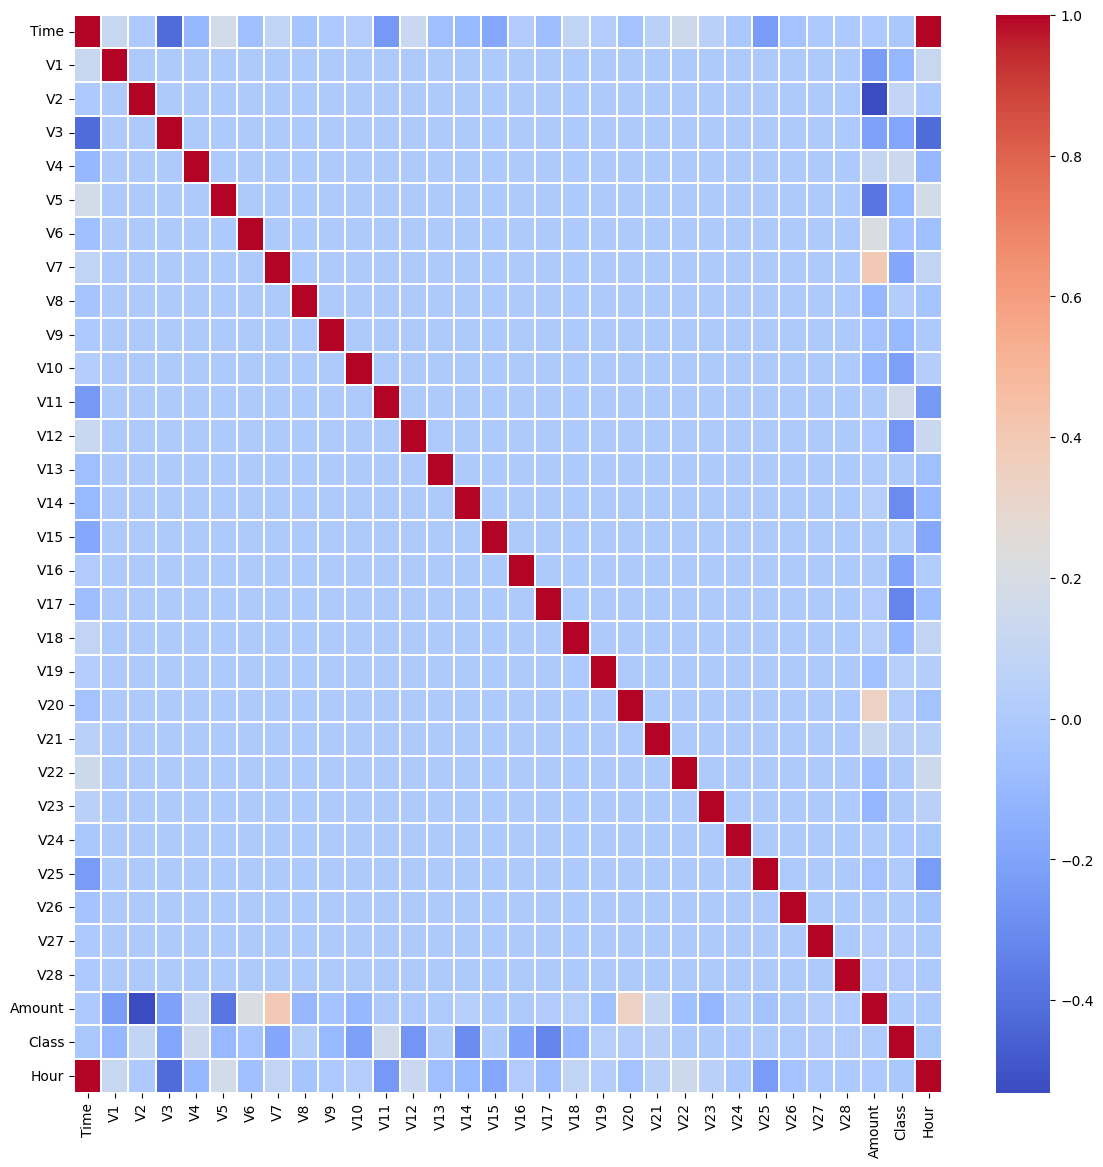

In [20]:
plt.figure(figsize = (14,14))
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.1, cmap="coolwarm")
plt.show()

As expected, there is no notable correlation between features **V1**-**V28**. There are certain correlations between some of these features and **Time** (inverse correlation with **V3**) and **Amount** (direct correlation with **V7** and **V20**, inverse correlation with **V1** and **V5**).


Let's plot the correlated and inverse correlated values on the same graph.

Let's start with the direct correlated values: {V20;Amount} and {V7;Amount}.

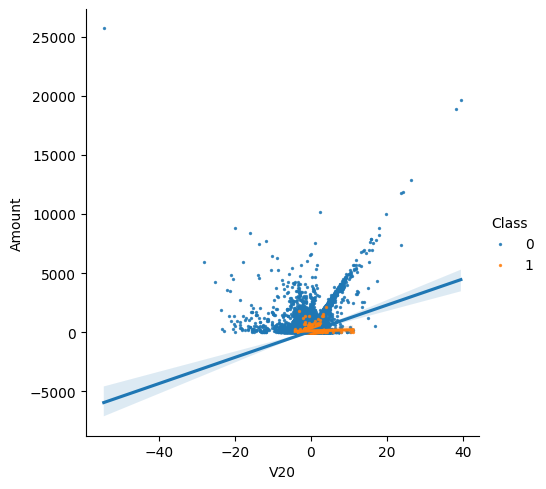

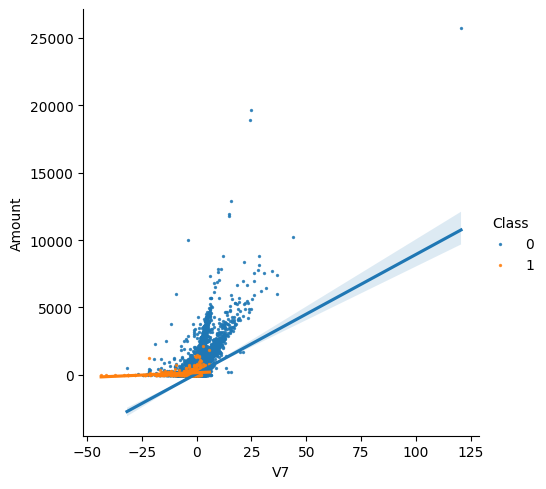

In [21]:
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7' , y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are correlated (the regression lines for **Class = 0** have a positive slope, whilst the regression line for **Class = 1** have a smaller positive slope).

Let's plot now the inverse correlated values.

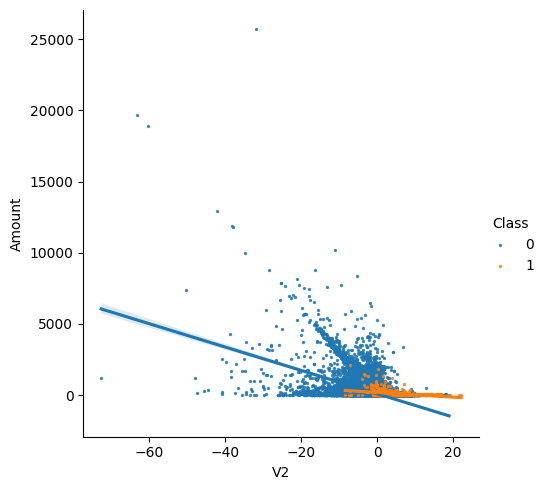

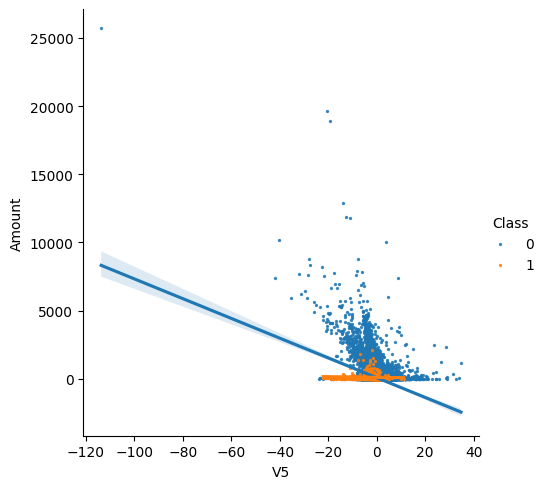

In [22]:
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

We can confirm that the two couples of features are inverse correlated (the regression lines for **Class = 0** have a negative slope while the regression lines for **Class = 1** have a very small negative slope).


### Features density plot

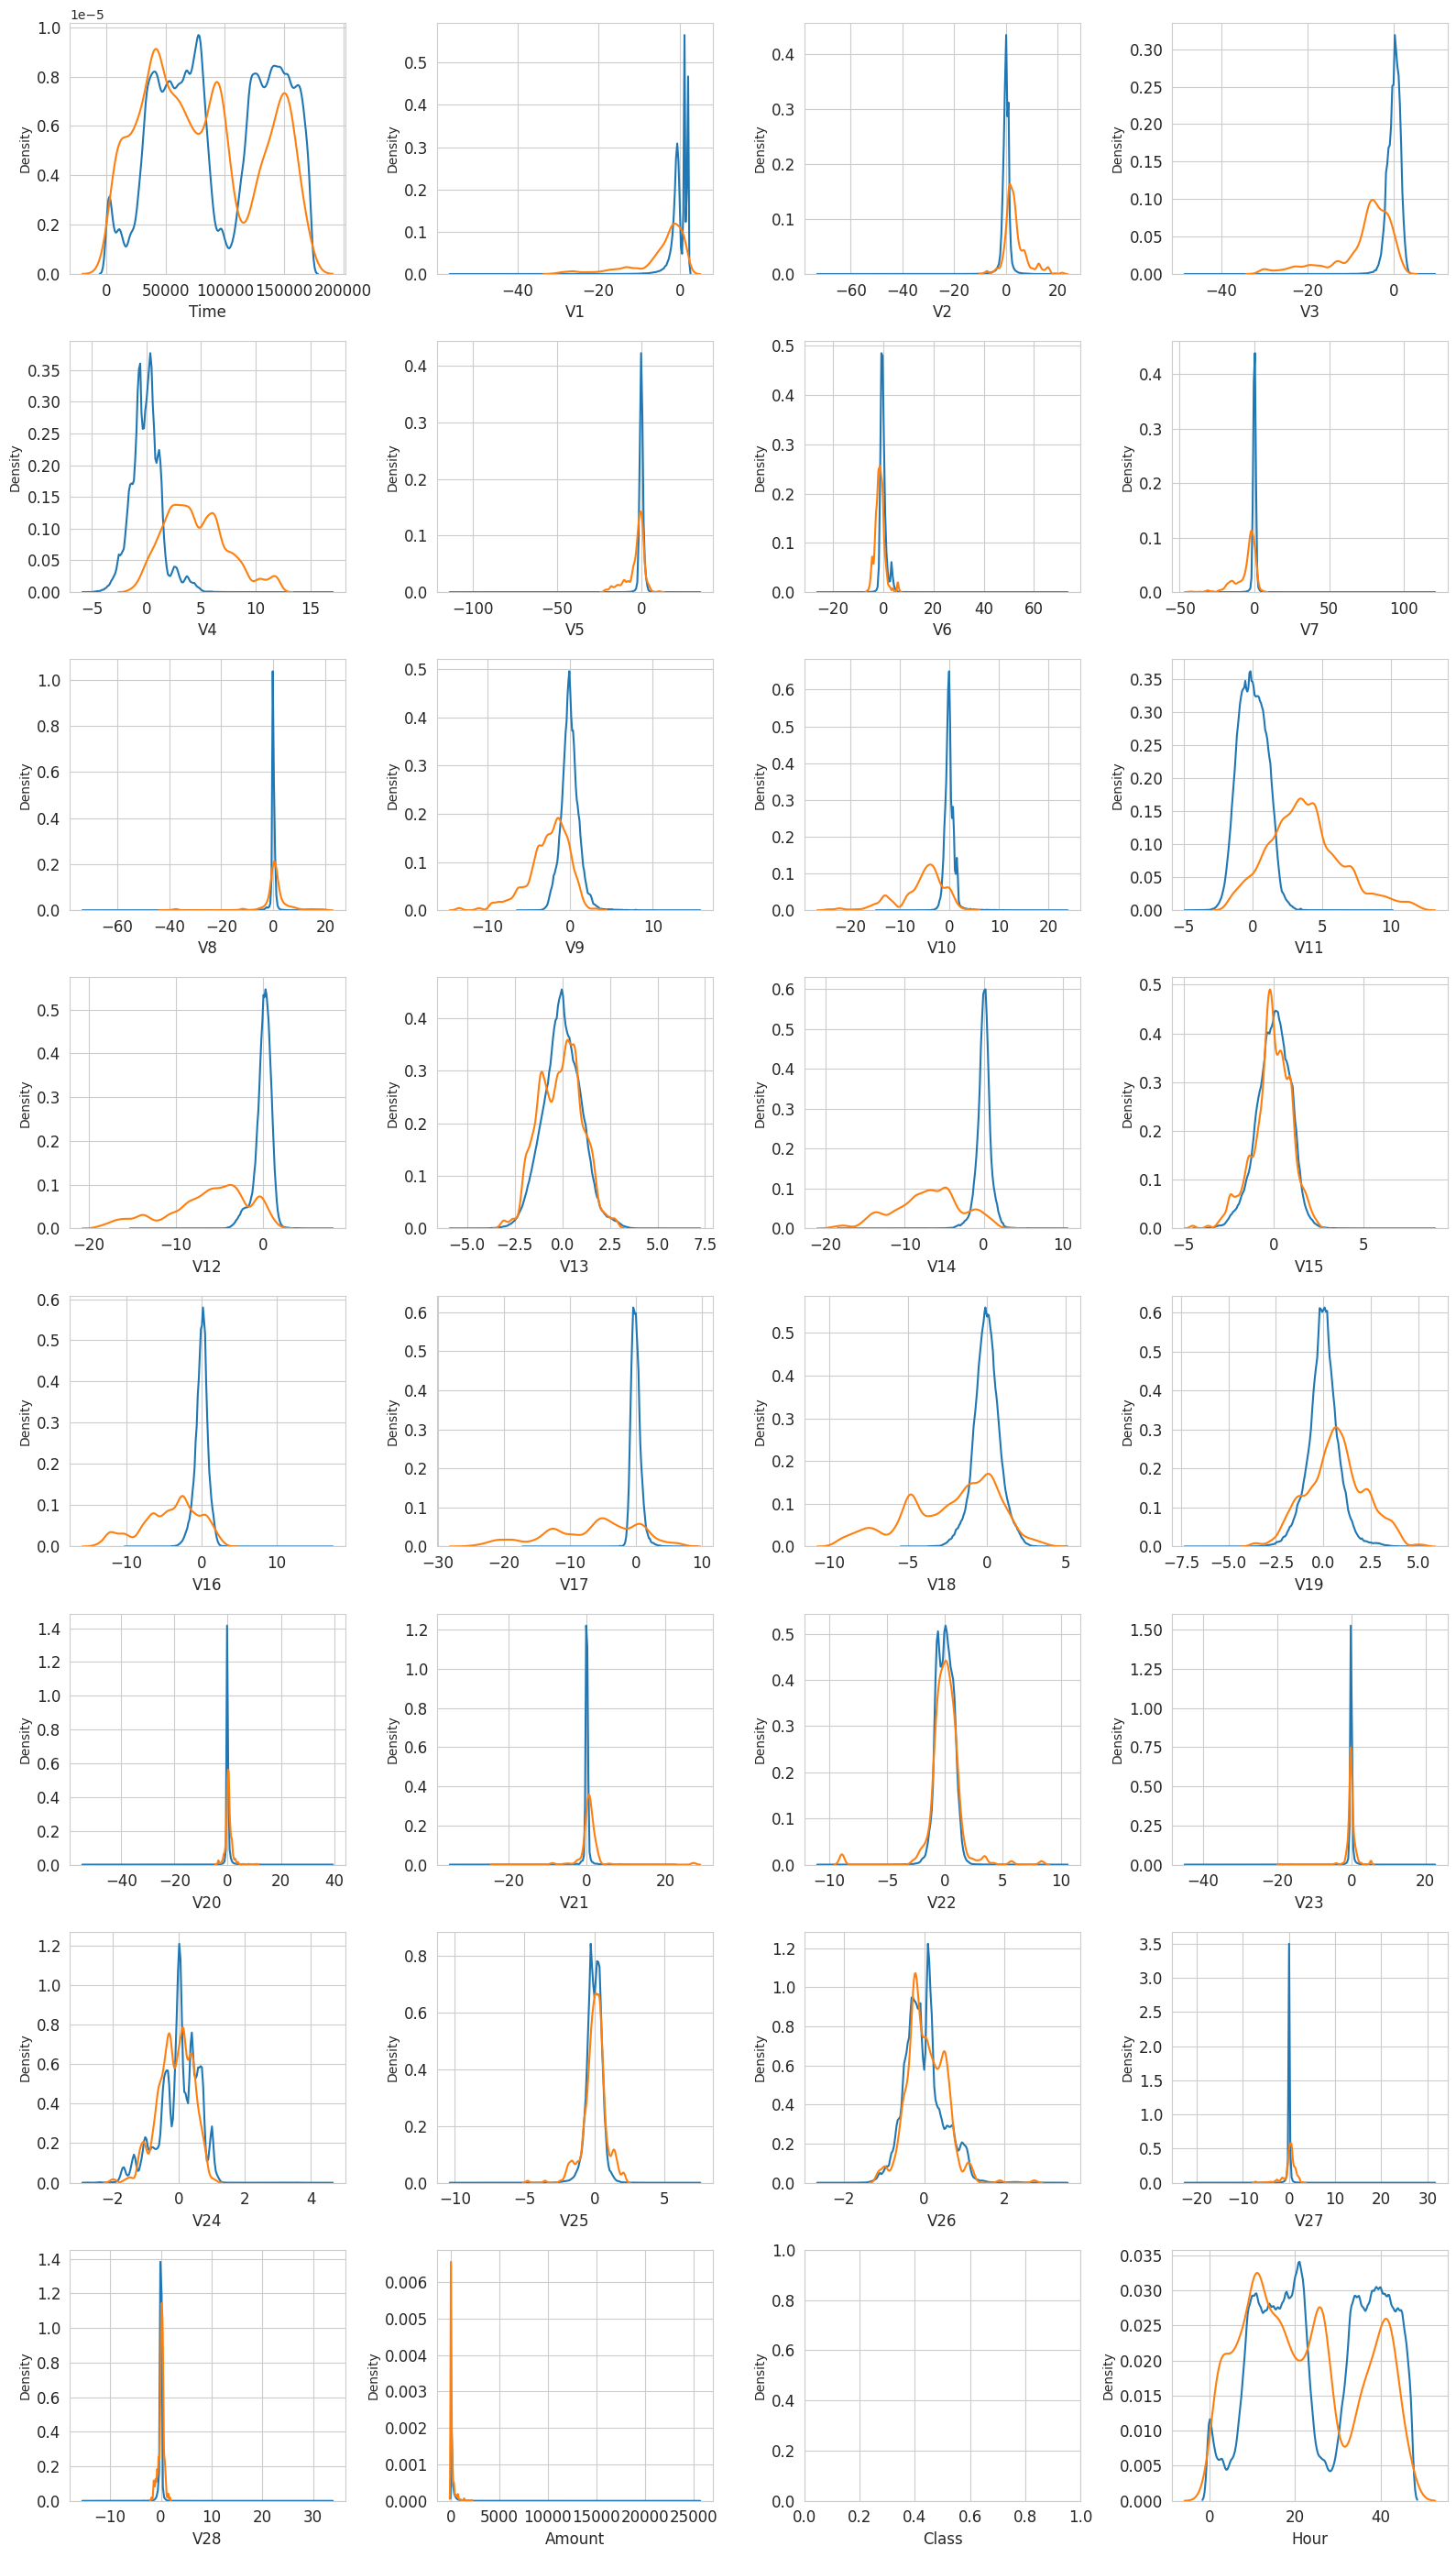

In [23]:
t0 = df[df['Class'] == 0]
t1 = df[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure(figsize=(16, 28))

for i, feature in enumerate(df.columns):
    plt.subplot(8, 4, i + 1)
    sns.kdeplot(t0[feature], label="Class = 0", bw_adjust=0.5, warn_singular=False)
    sns.kdeplot(t1[feature], label="Class = 1", bw_adjust=0.5, warn_singular=False)
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()
plt.show()


For some of the features we can observe a good selectivity in terms of distribution.

**V4**, **V11** have clearly separated distributions for **Class** values 0 and 1.

**V12**, **V14**, **V18** are partially separated.

**V1**, **V2**, **V3**, **V10** have a quite distinct profile.

**V25**, **V26**, **V28** have similar profiles for the two Classes.  

In general, with just few exceptions (**Time** and **Amount**), the features distribution for real transactions is centered around 0.

At the same time, the fraud transactions have a skewed distribution.

## Predictive models 



#### Define predictors and target values

In [24]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

#### Split data in train, test and validation set

In [25]:
train_df, test_df = train_test_split(df, test_size=.2 , random_state=42 , shuffle=True )
train_df, valid_df = train_test_split(train_df, test_size=.2, random_state=42, shuffle=True )

### RandomForestClassifier

In [26]:
clf = RandomForestClassifier(random_state=42, criterion='gini', n_estimators= 100, verbose=False)

In [27]:
clf.fit(train_df[predictors], train_df[target].values)

RandomForestClassifier(random_state=42, verbose=False)

In [28]:
preds = clf.predict(valid_df[predictors])

#### Features importance

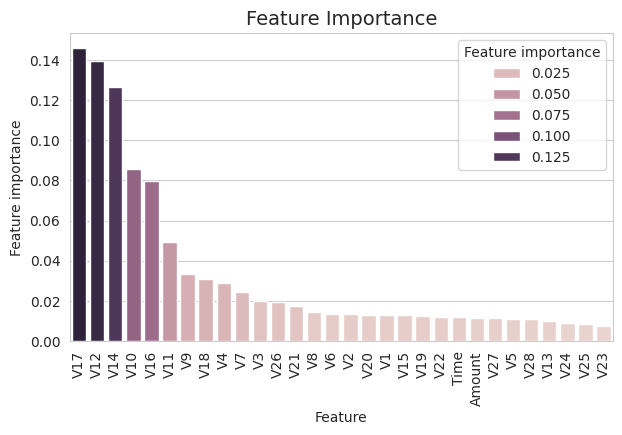

In [29]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize=(7, 4))
plt.title('Feature Importance', fontsize=14)
sns.barplot(x='Feature', y='Feature importance', hue='Feature importance',data=tmp)
plt.xticks(rotation=90)
plt.show()

The most important features are **V17**, **V12**, **V14**, **V10**, **V11**, **V16**.


#### Confusion matrix

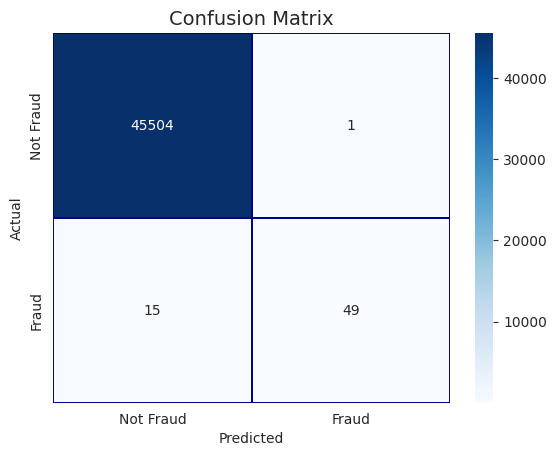

In [30]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.2, linecolor='darkblue',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### Area under curve

In [31]:
roc_auc_score(valid_df[target].values, preds)

0.8828015121964619

RandomForrestClassifier  ROC-AUC score is **0.88**

### AdaBoostClassifier

#### Prepare the model

In [32]:
clf = AdaBoostClassifier(random_state=42, algorithm='SAMME.R', learning_rate=0.8, n_estimators=100)

#### Fit the model

In [33]:
clf.fit(train_df[predictors], train_df[target].values)

AdaBoostClassifier(learning_rate=0.8, n_estimators=100, random_state=42)

#### Predict the target values

In [34]:
preds = clf.predict(valid_df[predictors])

#### Features importance

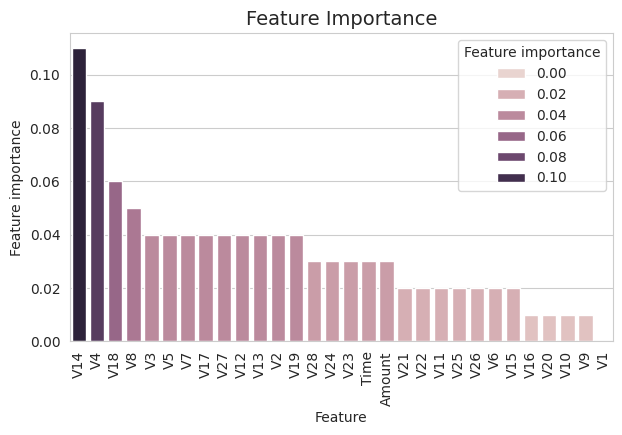

In [35]:
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})
tmp = tmp.sort_values(by='Feature importance', ascending=False)
plt.figure(figsize=(7, 4))
plt.title('Feature Importance', fontsize=14)
sns.barplot(x='Feature', y='Feature importance', data=tmp, hue='Feature importance')
plt.xticks(rotation=90)
plt.show()

#### Confusion matrix

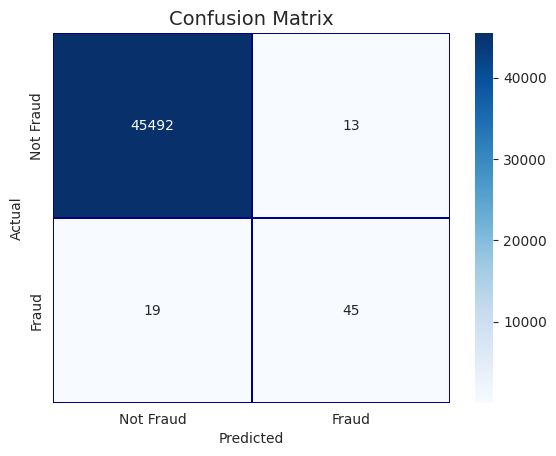

In [36]:
cm = pd.crosstab(valid_df[target].values, preds, rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.2, linecolor='darkblue',
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])

plt.title('Confusion Matrix', fontsize=14)
plt.show()

#### Area under curve

In [37]:
roc_auc_score(valid_df[target].values, preds)

0.851419658554005

AdaBoostClassifier  ROC-AUC score is **0.85**

### XGBoost

#### Prepare the model

We initialize the DMatrix objects for training and validation, starting from the datasets. We also set some of the parameters used for the model tuning.

In [38]:
dtrain = xgb.DMatrix(train_df[predictors], train_df[target].values)
dvalid = xgb.DMatrix(valid_df[predictors], valid_df[target].values)
dtest = xgb.DMatrix(test_df[predictors], test_df[target].values)

watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

params = {
    'objective': 'binary:logistic',
    'eta': 0.039,
    'max_depth': 2,
    'subsample': 0.8,
    'colsample_bytree': 0.9,
    'eval_metric': 'auc',
    'verbosity': 1,
    'random_state': 42
}

num_rounds = 1000
early_stopping_rounds = 50
verbose_eval = 50

#### Train the model

In [39]:
model = xgb.train(
    params=params,
    dtrain=dtrain,
    num_boost_round=num_rounds,
    evals=watchlist, 
    early_stopping_rounds=early_stopping_rounds,
    maximize=True,
    verbose_eval=verbose_eval
)

[0]	train-auc:0.89621	valid-auc:0.90551
[50]	train-auc:0.93009	valid-auc:0.93602
[100]	train-auc:0.96864	valid-auc:0.95775
[150]	train-auc:0.98656	valid-auc:0.97703
[184]	train-auc:0.98943	valid-auc:0.97612


#### Plot variable importance

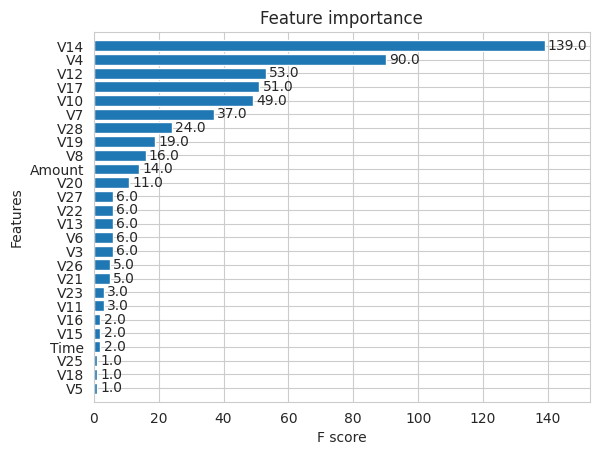

In [40]:
xgb.plot_importance(model, height=0.8)
plt.show()

#### Predict test set
We used the train and validation sets for training and validation. We will use the trained model now to predict the target value for the test set.

In [41]:
preds = model.predict(dtest)

#### Area under curve

In [42]:
roc_auc_score(test_df[target].values, preds)

0.9732573530256222

The AUC score for the prediction of fresh data (test set) is **0.97**

# <a id="7">Conclusions</a>

We investigated the data, checking for data unbalancing, visualizing the features and understanding the relationship between different features. 

We started with **RandomForrestClassifier**, for which we obtained an AUC score of **0.88** when predicting the target for the test set.  

then we experimented with a **AdaBoostClassifier** model, for which we obtained an AUC score of **0.85** when predicting the target for the validation set.  

We then experimented with a **XGBoost** model. In this case, we used the validation set for validation of the training model.  The best validation score obtained was   **0.977**. Then we used the model with the best training step, to predict target value from the test data; the AUC score obtained was **0.973**.
